<img src='images\image1.png'>

<img src='images\image4.png'>

<img src='images\image2.png'>

<h2>Loading data in to DataFrames</h2>

In [1]:
import pandas as pd
import numpy as np

pollution_data = pd.read_csv('data/pollution_us_2000_2016.csv')
climate_data = pd.read_csv('data/climate_data.csv')

In [2]:
pollution_data.head()

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


In [3]:
climate_data.head()

,State,City,Month,Day,Year,Average_Temperature,Date
0,Arizona,Phoenix,1,1,2000,56.4,2000-01-01
1,Arizona,Phoenix,1,2,2000,49.1,2000-01-02
2,Arizona,Phoenix,1,3,2000,45.8,2000-01-03
3,Arizona,Phoenix,1,4,2000,51.5,2000-01-04
4,Arizona,Phoenix,1,5,2000,47.9,2000-01-05


<h2>Check the Data Types of your data columns</h2>

In [4]:
pollution_data.columns

Index(['Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'Address',
       'State', 'County', 'City', 'Date Local', 'NO2 Units', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI'],
      dtype='object')

In [5]:
pollution_data.dtypes

Unnamed: 0             int64
State Code             int64
County Code            int64
Site Num               int64
Address               object
State                 object
County                object
City                  object
Date Local            object
NO2 Units             object
NO2 Mean             float64
NO2 1st Max Value    float64
NO2 1st Max Hour       int64
NO2 AQI                int64
O3 Units              object
O3 Mean              float64
O3 1st Max Value     float64
O3 1st Max Hour        int64
O3 AQI                 int64
SO2 Units             object
SO2 Mean             float64
SO2 1st Max Value    float64
SO2 1st Max Hour       int64
SO2 AQI              float64
CO Units              object
CO Mean              float64
CO 1st Max Value     float64
CO 1st Max Hour        int64
CO AQI               float64
dtype: object

In [6]:
climate_data.columns

Index(['State', 'City', 'Month', 'Day', 'Year', 'Average_Temperature', 'Date'], dtype='object')

In [7]:
climate_data.dtypes

State                   object
City                    object
Month                    int64
Day                      int64
Year                     int64
Average_Temperature    float64
Date                    object
dtype: object

<h2>Drop any NULL, missing values or unwanted columns</h2>

In [8]:
pollution_data = pollution_data.drop([x for x in pollution_data.columns if x not in ['State', 'City', 'NO2 Mean', 'O3 Mean', 'SO2 Mean', 'CO Mean', 'Date Local']], axis=1)
pollution_data.head()

,State,City,Date Local,NO2 Mean,O3 Mean,SO2 Mean,CO Mean
0,Arizona,Phoenix,2000-01-01,19.041667,0.022500,3.000000,1.145833
1,Arizona,Phoenix,2000-01-01,19.041667,0.022500,3.000000,0.878947
2,Arizona,Phoenix,2000-01-01,19.041667,0.022500,2.975000,1.145833
3,Arizona,Phoenix,2000-01-01,19.041667,0.022500,2.975000,0.878947
4,Arizona,Phoenix,2000-01-02,22.958333,0.013375,1.958333,0.850000


In [9]:
cities_to_drop = pollution_data[~(pollution_data.City == 'Los Angeles') & 
                       ~(pollution_data.City == 'San Diego') & 
                       ~(pollution_data.City == 'San Francisco') & 
                       ~(pollution_data.City == 'New York') & 
                       ~(pollution_data.City == 'Newark') & 
                       ~(pollution_data.City == 'Philadelphia') & 
                       ~(pollution_data.City == 'Denver') & 
                       ~(pollution_data.City == 'Dallas') & 
                       ~(pollution_data.City == 'Houston') & 
                       ~(pollution_data.City == 'Portland') & 
                       ~(pollution_data.City == 'Chicago') & 
                       ~(pollution_data.City == 'Phoenix') & 
                       ~(pollution_data.City == 'Detroit') & 
                       ~(pollution_data.City == 'Boston')
                       ].index
pollution_data.drop(cities_to_drop, inplace=True)
pollution_data.columns = ["State", "City", "Date", "NO2", "O3", "SO2", "CO"]
pollution_data

,State,City,Date,NO2,O3,SO2,CO
0,Arizona,Phoenix,2000-01-01,19.041667,0.022500,3.000000,1.145833
1,Arizona,Phoenix,2000-01-01,19.041667,0.022500,3.000000,0.878947
2,Arizona,Phoenix,2000-01-01,19.041667,0.022500,2.975000,1.145833
3,Arizona,Phoenix,2000-01-01,19.041667,0.022500,2.975000,0.878947
4,Arizona,Phoenix,2000-01-02,22.958333,0.013375,1.958333,0.850000
...,...,...,...,...,...,...,...
1744946,Texas,Houston,2016-03-30,9.700000,0.014250,-0.187500,0.166667
1744947,Texas,Houston,2016-03-31,11.066667,0.018263,-0.141667,0.214250
1744948,Texas,Houston,2016-03-31,11.066667,0.018263,-0.141667,0.179167
1744949,Texas,Houston,2016-03-31,11.066667,0.018263,-0.112500,0.214250


In [10]:
pollution_data['Year'] = pd.DatetimeIndex(pollution_data['Date']).year
pollution_data['Month'] = pd.DatetimeIndex(pollution_data['Date']).month
pollution_data['Day'] = pd.DatetimeIndex(pollution_data['Date']).day
pollution_data

,State,City,Date,NO2,O3,SO2,CO,Year,Month,Day
0,Arizona,Phoenix,2000-01-01,19.041667,0.022500,3.000000,1.145833,2000,1,1
1,Arizona,Phoenix,2000-01-01,19.041667,0.022500,3.000000,0.878947,2000,1,1
2,Arizona,Phoenix,2000-01-01,19.041667,0.022500,2.975000,1.145833,2000,1,1
3,Arizona,Phoenix,2000-01-01,19.041667,0.022500,2.975000,0.878947,2000,1,1
4,Arizona,Phoenix,2000-01-02,22.958333,0.013375,1.958333,0.850000,2000,1,2
...,...,...,...,...,...,...,...,...,...,...
1744946,Texas,Houston,2016-03-30,9.700000,0.014250,-0.187500,0.166667,2016,3,30
1744947,Texas,Houston,2016-03-31,11.066667,0.018263,-0.141667,0.214250,2016,3,31
1744948,Texas,Houston,2016-03-31,11.066667,0.018263,-0.141667,0.179167,2016,3,31
1744949,Texas,Houston,2016-03-31,11.066667,0.018263,-0.112500,0.214250,2016,3,31


In [11]:
pollution_data_mask = pollution_data['Year'] < 2016
pollution_data = pollution_data[pollution_data_mask]
pollution_data

,State,City,Date,NO2,O3,SO2,CO,Year,Month,Day
0,Arizona,Phoenix,2000-01-01,19.041667,0.022500,3.000000,1.145833,2000,1,1
1,Arizona,Phoenix,2000-01-01,19.041667,0.022500,3.000000,0.878947,2000,1,1
2,Arizona,Phoenix,2000-01-01,19.041667,0.022500,2.975000,1.145833,2000,1,1
3,Arizona,Phoenix,2000-01-01,19.041667,0.022500,2.975000,0.878947,2000,1,1
4,Arizona,Phoenix,2000-01-02,22.958333,0.013375,1.958333,0.850000,2000,1,2
...,...,...,...,...,...,...,...,...,...,...
1712288,Texas,Houston,2015-12-30,6.312500,0.012042,-0.162500,0.270588,2015,12,30
1712289,Texas,Houston,2015-12-31,4.075000,0.020211,-0.004167,0.208000,2015,12,31
1712290,Texas,Houston,2015-12-31,4.075000,0.020211,-0.004167,0.200000,2015,12,31
1712291,Texas,Houston,2015-12-31,4.075000,0.020211,0.000000,0.208000,2015,12,31


In [12]:
climate_data_mask = climate_data['Year'] < 2016
climate_data = climate_data[climate_data_mask]
climate_data

,State,City,Month,Day,Year,Average_Temperature,Date
0,Arizona,Phoenix,1,1,2000,56.4,2000-01-01
1,Arizona,Phoenix,1,2,2000,49.1,2000-01-02
2,Arizona,Phoenix,1,3,2000,45.8,2000-01-03
3,Arizona,Phoenix,1,4,2000,51.5,2000-01-04
4,Arizona,Phoenix,1,5,2000,47.9,2000-01-05
...,...,...,...,...,...,...,...
102227,Texas,Dallas,12,26,2015,72.6,2015-12-26
102228,Texas,Dallas,12,27,2015,48.9,2015-12-27
102229,Texas,Dallas,12,28,2015,38.8,2015-12-28
102230,Texas,Dallas,12,29,2015,37.6,2015-12-29


<h2>Checking for outliers</h2>

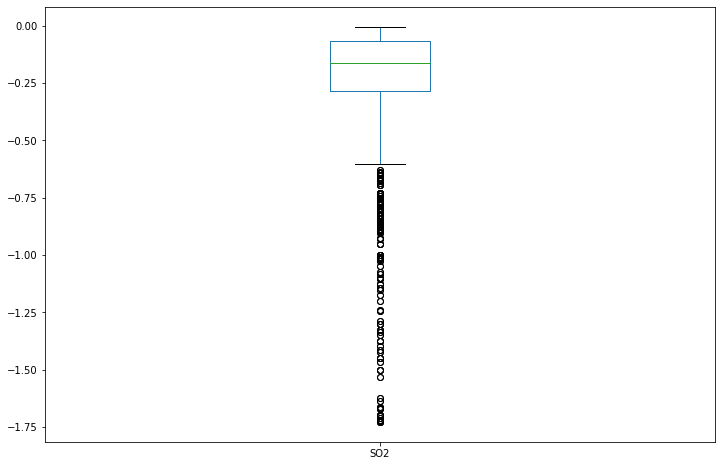

In [13]:
pollution_data['SO2'][pollution_data['SO2'] < 0].plot.box(figsize=(12,8))

In [14]:
pollution_data['NO2'][pollution_data['NO2'] < 0].values

array([-0.152174, -0.152174, -0.152174, -0.152174])

In [15]:
pollution_data['O3'][pollution_data['O3'] < 0].values

array([], dtype=float64)

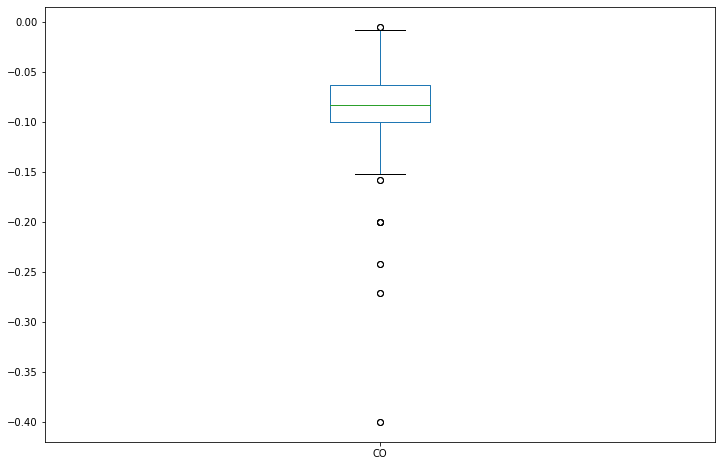

In [16]:
pollution_data['CO'][pollution_data['CO'] < 0].plot.box(figsize=(12,8))

In [17]:
for column in ['NO2', 'O3', 'SO2', 'CO']:
    negatives = pollution_data[(pollution_data[column].lt(0))].index
    pollution_data.loc[negatives, column] = 0

C:\Users\rmart\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [18]:
pollution_data

,State,City,Date,NO2,O3,SO2,CO,Year,Month,Day
0,Arizona,Phoenix,2000-01-01,19.041667,0.022500,3.000000,1.145833,2000,1,1
1,Arizona,Phoenix,2000-01-01,19.041667,0.022500,3.000000,0.878947,2000,1,1
2,Arizona,Phoenix,2000-01-01,19.041667,0.022500,2.975000,1.145833,2000,1,1
3,Arizona,Phoenix,2000-01-01,19.041667,0.022500,2.975000,0.878947,2000,1,1
4,Arizona,Phoenix,2000-01-02,22.958333,0.013375,1.958333,0.850000,2000,1,2
...,...,...,...,...,...,...,...,...,...,...
1712288,Texas,Houston,2015-12-30,6.312500,0.012042,0.000000,0.270588,2015,12,30
1712289,Texas,Houston,2015-12-31,4.075000,0.020211,0.000000,0.208000,2015,12,31
1712290,Texas,Houston,2015-12-31,4.075000,0.020211,0.000000,0.200000,2015,12,31
1712291,Texas,Houston,2015-12-31,4.075000,0.020211,0.000000,0.208000,2015,12,31


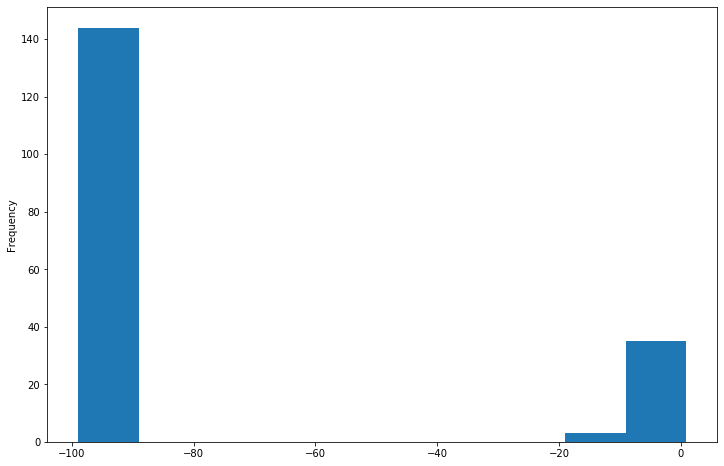

In [19]:
climate_data['Average_Temperature'][climate_data['Average_Temperature'] < 1].plot.hist(figsize=(12,8))

In [20]:
climate_data_mask = climate_data['Average_Temperature'] > -20
climate_data = climate_data[climate_data_mask]
climate_data

,State,City,Month,Day,Year,Average_Temperature,Date
0,Arizona,Phoenix,1,1,2000,56.4,2000-01-01
1,Arizona,Phoenix,1,2,2000,49.1,2000-01-02
2,Arizona,Phoenix,1,3,2000,45.8,2000-01-03
3,Arizona,Phoenix,1,4,2000,51.5,2000-01-04
4,Arizona,Phoenix,1,5,2000,47.9,2000-01-05
...,...,...,...,...,...,...,...
102227,Texas,Dallas,12,26,2015,72.6,2015-12-26
102228,Texas,Dallas,12,27,2015,48.9,2015-12-27
102229,Texas,Dallas,12,28,2015,38.8,2015-12-28
102230,Texas,Dallas,12,29,2015,37.6,2015-12-29


In [21]:
def get_avg_gases_per_month_year(data, cities, year_range=(2000, 2016), month_range=(1, 13)):
    avg_year_month = {}
    for city in cities:
        avg_year_month[city] = {'NO2': {}, 'O3': {}, 'SO2': {}, 'CO': {}}
        data_temp = data
        data_temp = data[data['City'] == city]

        for year in range(year_range[0], year_range[1]):
            for month in range(month_range[0], month_range[1]):
                year_month = str(year) + '-' + ('0'+str(month) if len(str(month))== 1 else str(month))
                data_mean = (data_temp['Year'] == year) & (data_temp['Month'] == month)
                for gas in ['NO2', 'O3', 'SO2', 'CO']:
                    data_mean_values = data_temp[data_mean][gas].sum() / len(data_temp[data_mean][gas])
                    avg_year_month[city][gas][year_month] = round(data_mean_values, 4)
    return avg_year_month

In [22]:
cities = ['Los Angeles', 'New York', 'Dallas', 'Houston', 'Phoenix', 'Boston']
states = ['California', 'New York', 'Texas', 'Texas', 'Arizona', 'Massachusetts']

In [23]:
pollution_data_mask = (pollution_data['City'] == 'San Diego') & (pollution_data['Year'] == 2016)
pollution_data[pollution_data_mask]

,State,City,Date,NO2,O3,SO2,CO,Year,Month,Day


In [24]:
cities_data = get_avg_gases_per_month_year(pollution_data, cities)
cities_data

<ipython-input-21-923640afa5af>:13: RuntimeWarning: invalid value encountered in double_scalars
  data_mean_values = data_temp[data_mean][gas].sum() / len(data_temp[data_mean][gas])


{'Los Angeles': {'NO2': {'2000-01': nan,
   '2000-02': nan,
   '2000-03': 37.2482,
   '2000-04': 38.5768,
   '2000-05': 35.467,
   '2000-06': 30.029,
   '2000-07': 32.094,
   '2000-08': 35.0505,
   '2000-09': 41.8362,
   '2000-10': 36.7055,
   '2000-11': 52.1884,
   '2000-12': 61.9314,
   '2001-01': 50.0743,
   '2001-02': 39.1289,
   '2001-03': 34.6241,
   '2001-04': 32.9374,
   '2001-05': 33.3837,
   '2001-06': 36.0616,
   '2001-07': 31.9608,
   '2001-08': 39.1636,
   '2001-09': 40.9808,
   '2001-10': 46.6444,
   '2001-11': 40.4753,
   '2001-12': 35.7052,
   '2002-01': 34.6857,
   '2002-02': 43.4348,
   '2002-03': 30.9866,
   '2002-04': 27.0913,
   '2002-05': 25.0124,
   '2002-06': 25.2829,
   '2002-07': 25.3844,
   '2002-08': 31.8602,
   '2002-09': 39.4478,
   '2002-10': 36.8705,
   '2002-11': 42.5797,
   '2002-12': 36.5189,
   '2003-01': 41.7444,
   '2003-02': 30.2776,
   '2003-03': 35.5281,
   '2003-04': 23.8789,
   '2003-05': 31.0606,
   '2003-06': 23.5875,
   '2003-07': 28.5275,


In [25]:
def frame_cities(data, city):
    data = pd.DataFrame(data[city])
    data = data.reset_index()
    data['City'] = city
    data = data.rename(columns={'index':'Date'})
    return data

In [26]:
list_cities = []
for city in cities:
    list_cities.append(frame_cities(cities_data, city))
list_cities

[        Date      NO2      O3     SO2      CO         City
 0    2000-01      NaN     NaN     NaN     NaN  Los Angeles
 1    2000-02      NaN     NaN     NaN     NaN  Los Angeles
 2    2000-03  37.2482  0.0168  0.6172  1.0434  Los Angeles
 3    2000-04  38.5768  0.0198  0.5682  0.9370  Los Angeles
 4    2000-05  35.4670  0.0260  0.7555  0.8015  Los Angeles
 ..       ...      ...     ...     ...     ...          ...
 187  2015-08  11.8702  0.0287  0.2023  0.2416  Los Angeles
 188  2015-09  13.1905  0.0290  0.1973  0.2560  Los Angeles
 189  2015-10  18.5110  0.0272  0.3426  0.3785  Los Angeles
 190  2015-11  23.6263  0.0219  0.4140  0.4686  Los Angeles
 191  2015-12  23.5252  0.0183  0.4512  0.5012  Los Angeles
 
 [192 rows x 6 columns],
         Date      NO2      O3      SO2      CO      City
 0    2000-01  26.1259  0.0118  10.6770  0.4773  New York
 1    2000-02  31.1326  0.0130  11.0958  0.7063  New York
 2    2000-03  27.9750  0.0179   5.5962  0.5298  New York
 3    2000-04  22.449

In [27]:
list_cities[0]

,Date,NO2,O3,SO2,CO,City
0,2000-01,NaN,NaN,NaN,NaN,Los Angeles
1,2000-02,NaN,NaN,NaN,NaN,Los Angeles
2,2000-03,37.2482,0.0168,0.6172,1.0434,Los Angeles
3,2000-04,38.5768,0.0198,0.5682,0.9370,Los Angeles
4,2000-05,35.4670,0.0260,0.7555,0.8015,Los Angeles
...,...,...,...,...,...,...
187,2015-08,11.8702,0.0287,0.2023,0.2416,Los Angeles
188,2015-09,13.1905,0.0290,0.1973,0.2560,Los Angeles
189,2015-10,18.5110,0.0272,0.3426,0.3785,Los Angeles
190,2015-11,23.6263,0.0219,0.4140,0.4686,Los Angeles


In [28]:
cities_data_test = list_cities[0]
for i in range(1, len(list_cities)-1):
    cities_data_test = pd.concat([cities_data_test, list_cities[i]], ignore_index=True)

cities_data_test

,Date,NO2,O3,SO2,CO,City
0,2000-01,NaN,NaN,NaN,NaN,Los Angeles
1,2000-02,NaN,NaN,NaN,NaN,Los Angeles
2,2000-03,37.2482,0.0168,0.6172,1.0434,Los Angeles
3,2000-04,38.5768,0.0198,0.5682,0.9370,Los Angeles
4,2000-05,35.4670,0.0260,0.7555,0.8015,Los Angeles
...,...,...,...,...,...,...
955,2015-08,9.6219,0.0366,0.9594,0.2934,Phoenix
956,2015-09,12.1304,0.0277,1.1116,0.3319,Phoenix
957,2015-10,10.0799,0.0218,0.8680,0.4010,Phoenix
958,2015-11,23.3759,0.0163,0.8735,0.5673,Phoenix


In [29]:
cities_data_test = cities_data_test.dropna()
cities_data_test = cities_data_test.reset_index()
cities_data_test

,index,Date,NO2,O3,SO2,CO,City
0,2,2000-03,37.2482,0.0168,0.6172,1.0434,Los Angeles
1,3,2000-04,38.5768,0.0198,0.5682,0.9370,Los Angeles
2,4,2000-05,35.4670,0.0260,0.7555,0.8015,Los Angeles
3,5,2000-06,30.0290,0.0251,0.5240,0.6696,Los Angeles
4,6,2000-07,32.0940,0.0228,0.7704,0.7455,Los Angeles
...,...,...,...,...,...,...,...
931,955,2015-08,9.6219,0.0366,0.9594,0.2934,Phoenix
932,956,2015-09,12.1304,0.0277,1.1116,0.3319,Phoenix
933,957,2015-10,10.0799,0.0218,0.8680,0.4010,Phoenix
934,958,2015-11,23.3759,0.0163,0.8735,0.5673,Phoenix


In [30]:
cities_data_test = cities_data_test.drop(columns=('index'))
cities_data_test

,Date,NO2,O3,SO2,CO,City
0,2000-03,37.2482,0.0168,0.6172,1.0434,Los Angeles
1,2000-04,38.5768,0.0198,0.5682,0.9370,Los Angeles
2,2000-05,35.4670,0.0260,0.7555,0.8015,Los Angeles
3,2000-06,30.0290,0.0251,0.5240,0.6696,Los Angeles
4,2000-07,32.0940,0.0228,0.7704,0.7455,Los Angeles
...,...,...,...,...,...,...
931,2015-08,9.6219,0.0366,0.9594,0.2934,Phoenix
932,2015-09,12.1304,0.0277,1.1116,0.3319,Phoenix
933,2015-10,10.0799,0.0218,0.8680,0.4010,Phoenix
934,2015-11,23.3759,0.0163,0.8735,0.5673,Phoenix


In [31]:
def parsing_date(data, column):    
    for i in ['Month', 'Year']:
        if i == 'Month':
            data[i] = data[column].str.split('-', expand=True)[1]
        else:
            data[i] = data[column].str.split('-', expand=True)[0]
    data = data.drop(column, axis=1)
    return data

In [32]:
cities_data_test = parsing_date(cities_data_test, 'Date')
cities_data_test

,NO2,O3,SO2,CO,City,Month,Year
0,37.2482,0.0168,0.6172,1.0434,Los Angeles,03,2000
1,38.5768,0.0198,0.5682,0.9370,Los Angeles,04,2000
2,35.4670,0.0260,0.7555,0.8015,Los Angeles,05,2000
3,30.0290,0.0251,0.5240,0.6696,Los Angeles,06,2000
4,32.0940,0.0228,0.7704,0.7455,Los Angeles,07,2000
...,...,...,...,...,...,...,...
931,9.6219,0.0366,0.9594,0.2934,Phoenix,08,2015
932,12.1304,0.0277,1.1116,0.3319,Phoenix,09,2015
933,10.0799,0.0218,0.8680,0.4010,Phoenix,10,2015
934,23.3759,0.0163,0.8735,0.5673,Phoenix,11,2015


In [33]:
climate_data.loc[climate_data['City'] == 'New York City', 'City'] = 'New York'

C:\Users\rmart\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [34]:
climate_data

,State,City,Month,Day,Year,Average_Temperature,Date
0,Arizona,Phoenix,1,1,2000,56.4,2000-01-01
1,Arizona,Phoenix,1,2,2000,49.1,2000-01-02
2,Arizona,Phoenix,1,3,2000,45.8,2000-01-03
3,Arizona,Phoenix,1,4,2000,51.5,2000-01-04
4,Arizona,Phoenix,1,5,2000,47.9,2000-01-05
...,...,...,...,...,...,...,...
102227,Texas,Dallas,12,26,2015,72.6,2015-12-26
102228,Texas,Dallas,12,27,2015,48.9,2015-12-27
102229,Texas,Dallas,12,28,2015,38.8,2015-12-28
102230,Texas,Dallas,12,29,2015,37.6,2015-12-29


In [35]:
mask = climate_data['City'] == 'New York'
climate_data[mask]

,State,City,Month,Day,Year,Average_Temperature,Date
29756,New York,New York,1,1,2000,39.7,2000-01-01
29757,New York,New York,1,2,2000,47.9,2000-01-02
29758,New York,New York,1,3,2000,57.8,2000-01-03
29759,New York,New York,1,4,2000,52.4,2000-01-04
29760,New York,New York,1,5,2000,43.6,2000-01-05
...,...,...,...,...,...,...,...
35595,New York,New York,12,27,2015,52.4,2015-12-27
35596,New York,New York,12,28,2015,44.8,2015-12-28
35597,New York,New York,12,29,2015,40.2,2015-12-29
35598,New York,New York,12,30,2015,41.8,2015-12-30


In [36]:
def get_avg_temp_per_month_year(data, cities, year_range=(2000, 2016), month_range=(1, 13)):
    avg_year_month = {}
    for city in cities:
        avg_year_month[city] = {}
        data_temp = data
        data_temp = data[data['City'] == city]

        for year in range(year_range[0], year_range[1]):
            for month in range(month_range[0], month_range[1]):
                data_mean = (data_temp['Year'] == year) & (data_temp['Month'] == month)
                data_mean_values = data_temp[data_mean]['Average_Temperature'].mean()
                year_month = str(year) + '-' + ('0'+str(month) if len(str(month))== 1 else str(month))            
                avg_year_month[city][year_month] = round(data_mean_values, 1)
    return avg_year_month

In [37]:
temp_data = get_avg_temp_per_month_year(climate_data, cities)
temp_data

{'Los Angeles': {'2000-01': 57.8,
  '2000-02': 57.2,
  '2000-03': 57.2,
  '2000-04': 60.7,
  '2000-05': 63.5,
  '2000-06': 66.9,
  '2000-07': 67.7,
  '2000-08': 69.9,
  '2000-09': 68.6,
  '2000-10': 63.0,
  '2000-11': 58.1,
  '2000-12': 58.0,
  '2001-01': 54.7,
  '2001-02': 54.2,
  '2001-03': 57.4,
  '2001-04': 56.9,
  '2001-05': 62.7,
  '2001-06': 66.6,
  '2001-07': 66.8,
  '2001-08': 67.0,
  '2001-09': 66.6,
  '2001-10': 64.1,
  '2001-11': 60.3,
  '2001-12': 55.4,
  '2002-01': 55.3,
  '2002-02': 58.1,
  '2002-03': 57.2,
  '2002-04': 58.0,
  '2002-05': 60.7,
  '2002-06': 64.5,
  '2002-07': 67.2,
  '2002-08': 66.6,
  '2002-09': 66.5,
  '2002-10': 62.2,
  '2002-11': 63.4,
  '2002-12': 56.2,
  '2003-01': 61.8,
  '2003-02': 58.0,
  '2003-03': 59.2,
  '2003-04': 58.0,
  '2003-05': 60.3,
  '2003-06': 64.0,
  '2003-07': 70.3,
  '2003-08': 70.0,
  '2003-09': 66.5,
  '2003-10': 66.5,
  '2003-11': 59.2,
  '2003-12': 56.7,
  '2004-01': 56.3,
  '2004-02': 55.6,
  '2004-03': 59.9,
  '2004-04': 61.

In [38]:
temp_data = pd.DataFrame(temp_data)

In [39]:
temp_data = temp_data.reset_index()

In [40]:
parsing_date(temp_data, 'index')

,Los Angeles,New York,Dallas,Houston,Phoenix,Boston,Month,Year
0,57.8,32.0,50.3,56.2,57.5,27.5,01,2000
1,57.2,36.9,57.8,61.4,60.8,34.1,02,2000
2,57.2,46.4,61.0,66.1,63.3,42.8,03,2000
3,60.7,50.2,65.4,68.2,75.7,47.0,04,2000
4,63.5,62.6,76.8,77.3,85.6,56.3,05,2000
...,...,...,...,...,...,...,...,...
187,71.7,78.8,87.0,84.0,96.4,73.8,08,2015
188,74.3,73.5,82.4,78.5,90.0,68.8,09,2015
189,73.3,58.1,71.4,72.8,78.8,54.0,10,2015
190,62.3,53.5,58.4,62.7,61.9,48.7,11,2015


In [42]:
temp_data = temp_data.drop(columns=('index'))
temp_data

,Los Angeles,New York,Dallas,Houston,Phoenix,Boston,Month,Year
0,57.8,32.0,50.3,56.2,57.5,27.5,01,2000
1,57.2,36.9,57.8,61.4,60.8,34.1,02,2000
2,57.2,46.4,61.0,66.1,63.3,42.8,03,2000
3,60.7,50.2,65.4,68.2,75.7,47.0,04,2000
4,63.5,62.6,76.8,77.3,85.6,56.3,05,2000
...,...,...,...,...,...,...,...,...
187,71.7,78.8,87.0,84.0,96.4,73.8,08,2015
188,74.3,73.5,82.4,78.5,90.0,68.8,09,2015
189,73.3,58.1,71.4,72.8,78.8,54.0,10,2015
190,62.3,53.5,58.4,62.7,61.9,48.7,11,2015


In [43]:
# cities_data_test & temp_data

<h2>Use a scatter plot to show the relationship between 2 variables</h2>

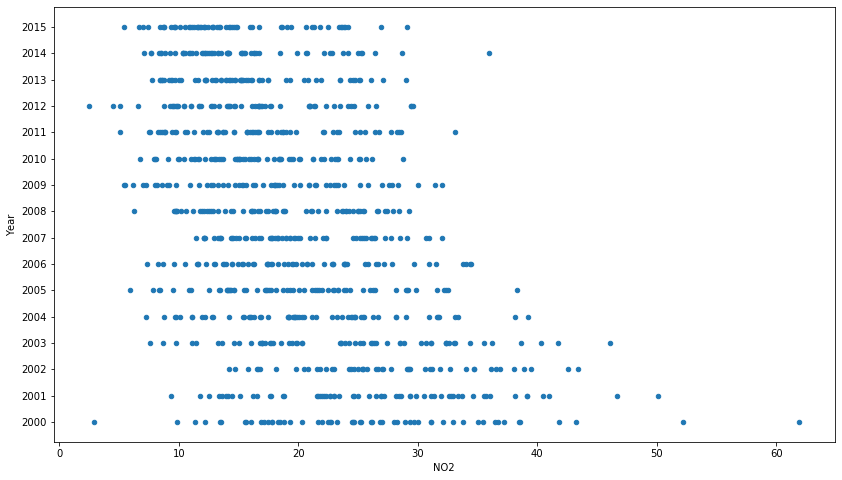

In [44]:
cities_data_test.plot.scatter(x='NO2', y='Year', figsize=(14,8))

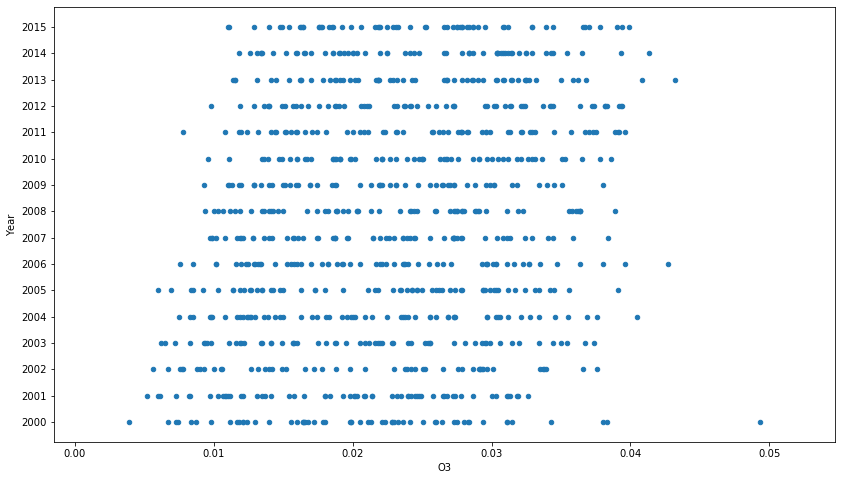

In [45]:
cities_data_test.plot.scatter(x='O3', y='Year', figsize=(14,8))

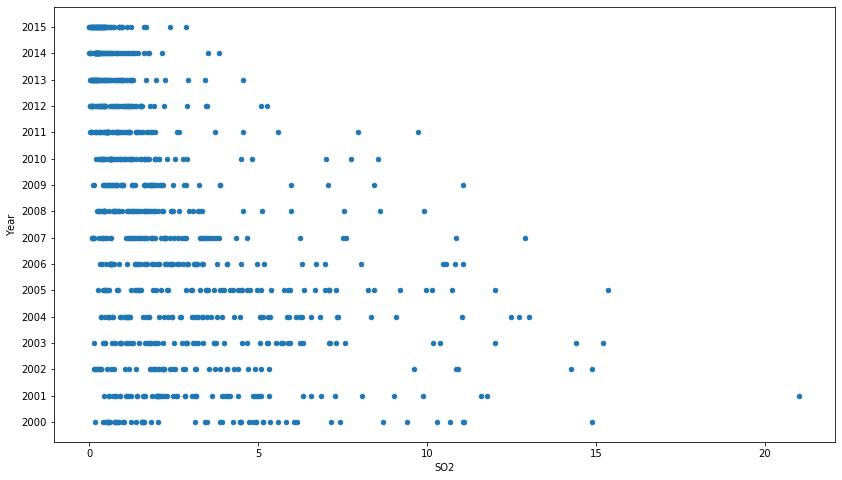

In [46]:
cities_data_test.plot.scatter(x='SO2', y='Year', figsize=(14,8))

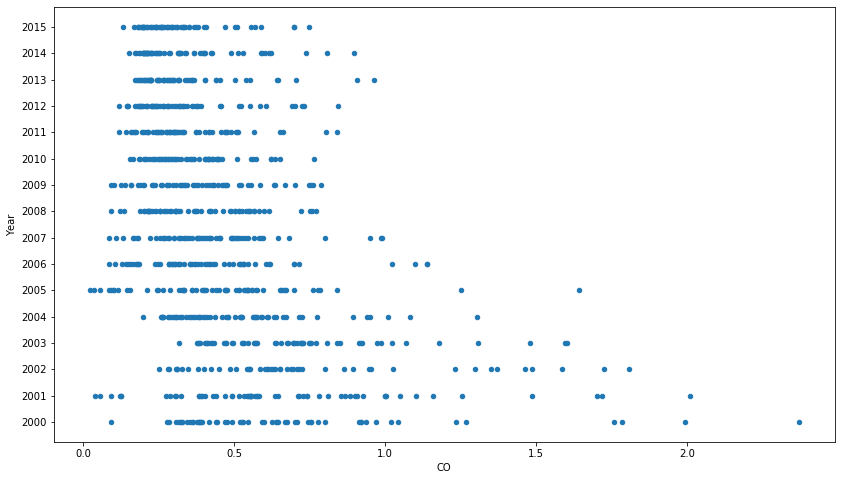

In [47]:
cities_data_test.plot.scatter(x='CO', y='Year', figsize=(14,8))

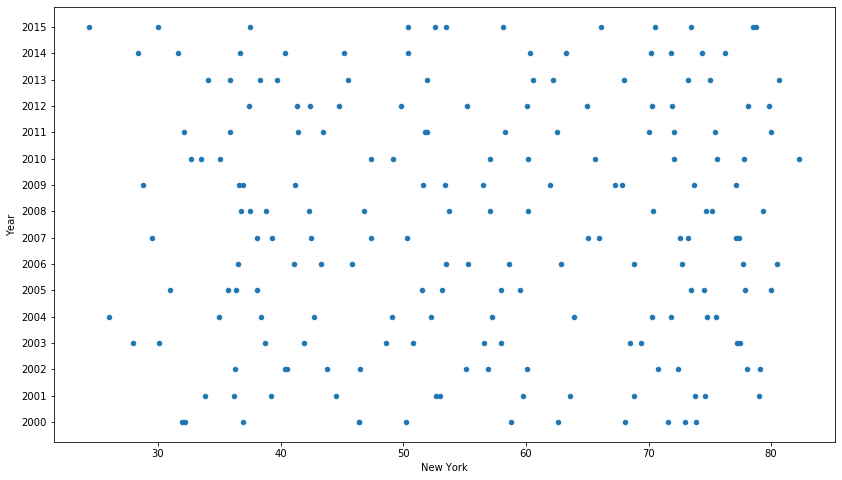

In [48]:
temp_data.plot.scatter(x='New York', y='Year', figsize=(14,8))

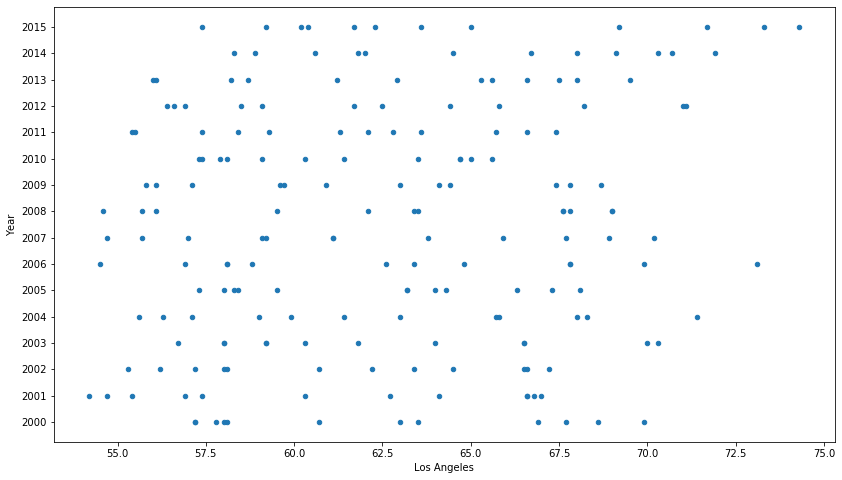

In [49]:
temp_data.plot.scatter(x='Los Angeles', y='Year', figsize=(14,8))

<h2>Merging two Data Frames</h2>

In [50]:
# Just merging to complete the task but we don't need to merge them
merged_data = cities_data_test.merge(temp_data)
merged_data

,NO2,O3,SO2,CO,City,Month,Year,Los Angeles,New York,Dallas,Houston,Phoenix,Boston
0,37.2482,0.0168,0.6172,1.0434,Los Angeles,03,2000,57.2,46.4,61.0,66.1,63.3,42.8
1,27.9750,0.0179,5.5962,0.5298,New York,03,2000,57.2,46.4,61.0,66.1,63.3,42.8
2,19.2776,0.0205,1.2477,0.3884,Dallas,03,2000,57.2,46.4,61.0,66.1,63.3,42.8
3,18.4741,0.0199,7.1681,0.3868,Houston,03,2000,57.2,46.4,61.0,66.1,63.3,42.8
4,32.9162,0.0230,0.5606,0.9185,Phoenix,03,2000,57.2,46.4,61.0,66.1,63.3,42.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,36.4951,0.0165,3.8742,1.2683,Phoenix,02,2000,57.2,36.9,57.8,61.4,60.8,34.1
932,13.9833,0.0372,1.3701,0.3318,New York,07,2012,65.8,79.8,87.0,81.7,93.5,74.9
933,6.5542,0.0321,0.2464,0.1180,Dallas,07,2012,65.8,79.8,87.0,81.7,93.5,74.9
934,9.4426,0.0139,0.3311,0.1453,Houston,07,2012,65.8,79.8,87.0,81.7,93.5,74.9


<h2>Slicing Data of a particular column value (like year, month, filter values depending on the categorical data)</h2>

In [51]:
cities_data_test['NO2'].iloc[0:10]

0    37.2482
1    38.5768
2    35.4670
3    30.0290
4    32.0940
5    35.0505
6    41.8362
7    36.7055
8    52.1884
9    61.9314
Name: NO2, dtype: float64

In [52]:
temp_data['Los Angeles'].iloc[0:10]

0    57.8
1    57.2
2    57.2
3    60.7
4    63.5
5    66.9
6    67.7
7    69.9
8    68.6
9    63.0
Name: Los Angeles, dtype: float64

<h2>Representing data in matrix form</h2>

In [53]:
cities_data_test.values

array([[37.2482, 0.0168, 0.6172, ..., 'Los Angeles', '03', '2000'],
       [38.5768, 0.0198, 0.5682, ..., 'Los Angeles', '04', '2000'],
       [35.467, 0.026, 0.7555, ..., 'Los Angeles', '05', '2000'],
       ...,
       [10.0799, 0.0218, 0.868, ..., 'Phoenix', '10', '2015'],
       [23.3759, 0.0163, 0.8735, ..., 'Phoenix', '11', '2015'],
       [26.9501, 0.0111, 1.6784, ..., 'Phoenix', '12', '2015']],
      dtype=object)

In [54]:
temp_data.values

array([[57.8, 32.0, 50.3, ..., 27.5, '01', '2000'],
       [57.2, 36.9, 57.8, ..., 34.1, '02', '2000'],
       [57.2, 46.4, 61.0, ..., 42.8, '03', '2000'],
       ...,
       [73.3, 58.1, 71.4, ..., 54.0, '10', '2015'],
       [62.3, 53.5, 58.4, ..., 48.7, '11', '2015'],
       [57.4, 50.4, 53.7, ..., 44.7, '12', '2015']], dtype=object)

<h2>Select a slice or part of the data and display</h2>

In [55]:
cities_data_test[0:5]

,NO2,O3,SO2,CO,City,Month,Year
0,37.2482,0.0168,0.6172,1.0434,Los Angeles,03,2000
1,38.5768,0.0198,0.5682,0.9370,Los Angeles,04,2000
2,35.4670,0.0260,0.7555,0.8015,Los Angeles,05,2000
3,30.0290,0.0251,0.5240,0.6696,Los Angeles,06,2000
4,32.0940,0.0228,0.7704,0.7455,Los Angeles,07,2000


In [56]:
temp_data[-6:-1]

,Los Angeles,New York,Dallas,Houston,Phoenix,Boston,Month,Year
186,69.2,78.5,87.4,85.0,95.2,73.2,07,2015
187,71.7,78.8,87.0,84.0,96.4,73.8,08,2015
188,74.3,73.5,82.4,78.5,90.0,68.8,09,2015
189,73.3,58.1,71.4,72.8,78.8,54.0,10,2015
190,62.3,53.5,58.4,62.7,61.9,48.7,11,2015


<h2>Select data based on a category(categorical data based)</h2>

In [57]:
cities_data_test['NO2']

0      37.2482
1      38.5768
2      35.4670
3      30.0290
4      32.0940
        ...   
931     9.6219
932    12.1304
933    10.0799
934    23.3759
935    26.9501
Name: NO2, Length: 936, dtype: float64

In [58]:
temp_data['Los Angeles']

0      57.8
1      57.2
2      57.2
3      60.7
4      63.5
       ... 
187    71.7
188    74.3
189    73.3
190    62.3
191    57.4
Name: Los Angeles, Length: 192, dtype: float64

<h2>Box Plot, Scatter Plot, Pair Plot, Z-score, Histogram, Heatmaps</h2>

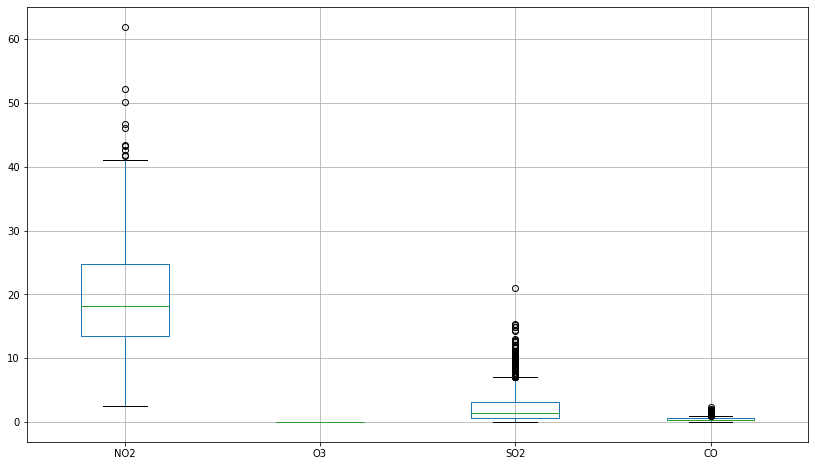

In [59]:
cities_data_test.boxplot(column=['NO2', 'O3', 'SO2', 'CO'], figsize=(14,8))

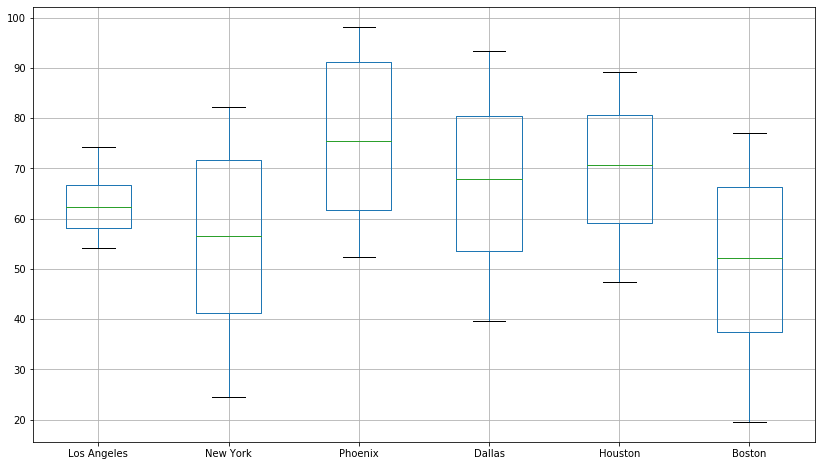

In [60]:
temp_data.boxplot(column=['Los Angeles', 'New York', 'Phoenix', 'Dallas', 'Houston', 'Boston'], figsize=(14,8))

In [61]:
from scipy.stats import zscore

df = temp_data[['Los Angeles', 'New York']]
df.apply(zscore)

,Los Angeles,New York
0,-0.982027,-1.505207
1,-1.106400,-1.196480
2,-1.106400,-0.597928
3,-0.380892,-0.358508
4,0.199515,0.422760
...,...,...
187,1.899276,1.443448
188,2.438225,1.109519
189,2.230937,0.139235
190,-0.049231,-0.150590


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017BFFE606A0>,
      dtype=object)

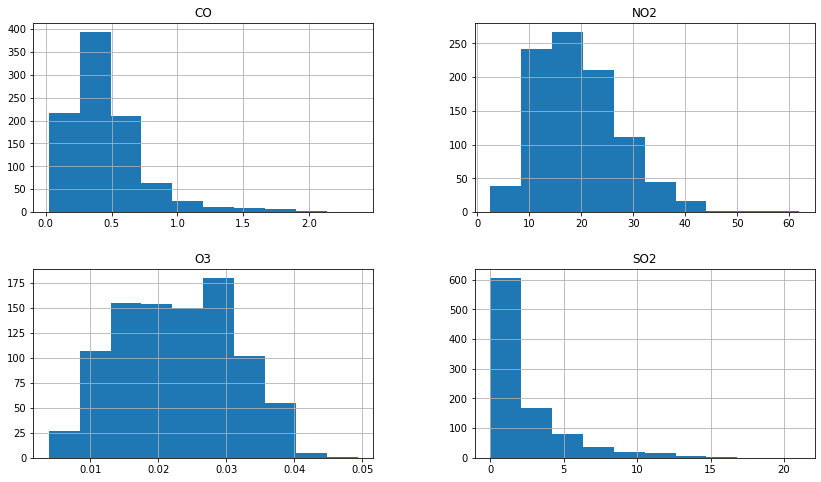

In [62]:
cities_data_test.hist(column=['NO2', 'O3', 'SO2', 'CO'], figsize=(14,8))

<img src='images\image3.png'>